In [ ]:
# Instructions

Évaluation des Stratégies : Le backtest permet aux traders et aux investisseurs de tester leurs stratégies sur des données passées avant de les appliquer dans des conditions réelles de marché. C’est un outil essentiel pour identifier les forces et les faiblesses d’une stratégie avant son déploiement.

Réduction des Risques : En testant une stratégie sur des données historiques, les investisseurs peuvent mieux comprendre et gérer les risques potentiels.

Optimisation des Stratégies : Les résultats d’un backtest peuvent être utilisés pour affiner et améliorer une stratégie, en ajustant ses paramètres pour maximiser les rendements potentiels.
Limites du Backtest
Bien que le backtest soit un outil puissant, il est important de reconnaître ses limites. Les résultats d’un backtest sont toujours basés sur des hypothèses et des simulations, et ne peuvent garantir des performances futures. Les limitations clés incluent :

Hypothèses de Simulation : Un backtest repose sur des hypothèses qui peuvent ne pas être entièrement représentatives des conditions réelles du marché.
Biais de Survie : Les données historiques peuvent exclure les actifs ou stratégies qui ont échoué dans le passé, conduisant à une perception faussée de la performance.
Changements du Marché : Les conditions de marché évoluent constamment, et une stratégie qui a réussi dans le passé pourrait ne pas être aussi efficace dans le futur en raison de changements dans les dynamiques du marché.
Objectif du Projet
Développer un backtester sous forme de classe, qui utilise une fonction prenant en entrée un historique de barres OHLCV (Open, High, Low, Close, Volume) et renvoyant la position d’une stratégie d’investissement.

 - Stratégie sur Plusieurs Actifs : Extension du backtester pour accepter une fonction de stratégie applicable à plusieurs actifs.
 - Statistiques Avancées : Calcul de statistiques plus élaborées comme le bêta en hausse et en baisse, le drawdown maximal, s’inspirant de sources telles que Quantalys ou Morningstar.
 - Résultats : Génération d’un graphique représentant la performance de la stratégie sur la période choisie, accompagné de statistiques de base telles que le rendement moyen, la variance, et le bêta.


In [2]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression

In [131]:
tickers = ['ZN=F', 'GC=F']
start = dt.datetime(year = 2000, month = 9, day =21)
end = dt.datetime.now()
data_10Y = yf.download(tickers[0],start,end)
data_gold = yf.download(tickers[-1],start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [132]:
data_10Y, data_gold = data_10Y.align(data_gold, join='outer', axis=0)

In [133]:
data_10Y = data_10Y['Close']

In [134]:
data_gold = data_gold['Close']

In [135]:
data = pd.merge(data_10Y, data_gold, on='Date')

In [136]:
data = result.rename(columns={'Close_x': '10Y', 'Close_y': 'Gold'})
data = data.dropna()

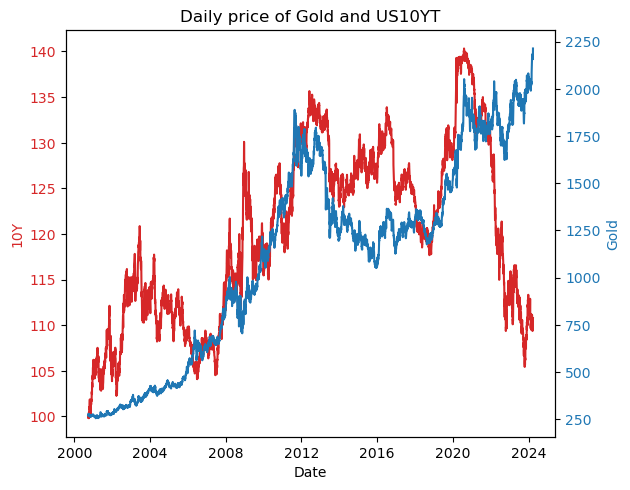

<Figure size 2000x2000 with 0 Axes>

In [137]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('10Y', color=color)
ax1.plot(result['10Y'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Gold', color=color)
ax2.plot(result['Gold'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 
plt.title("Daily price of Gold and US10YT")
plt.figure(figsize= (20,20))
plt.show()


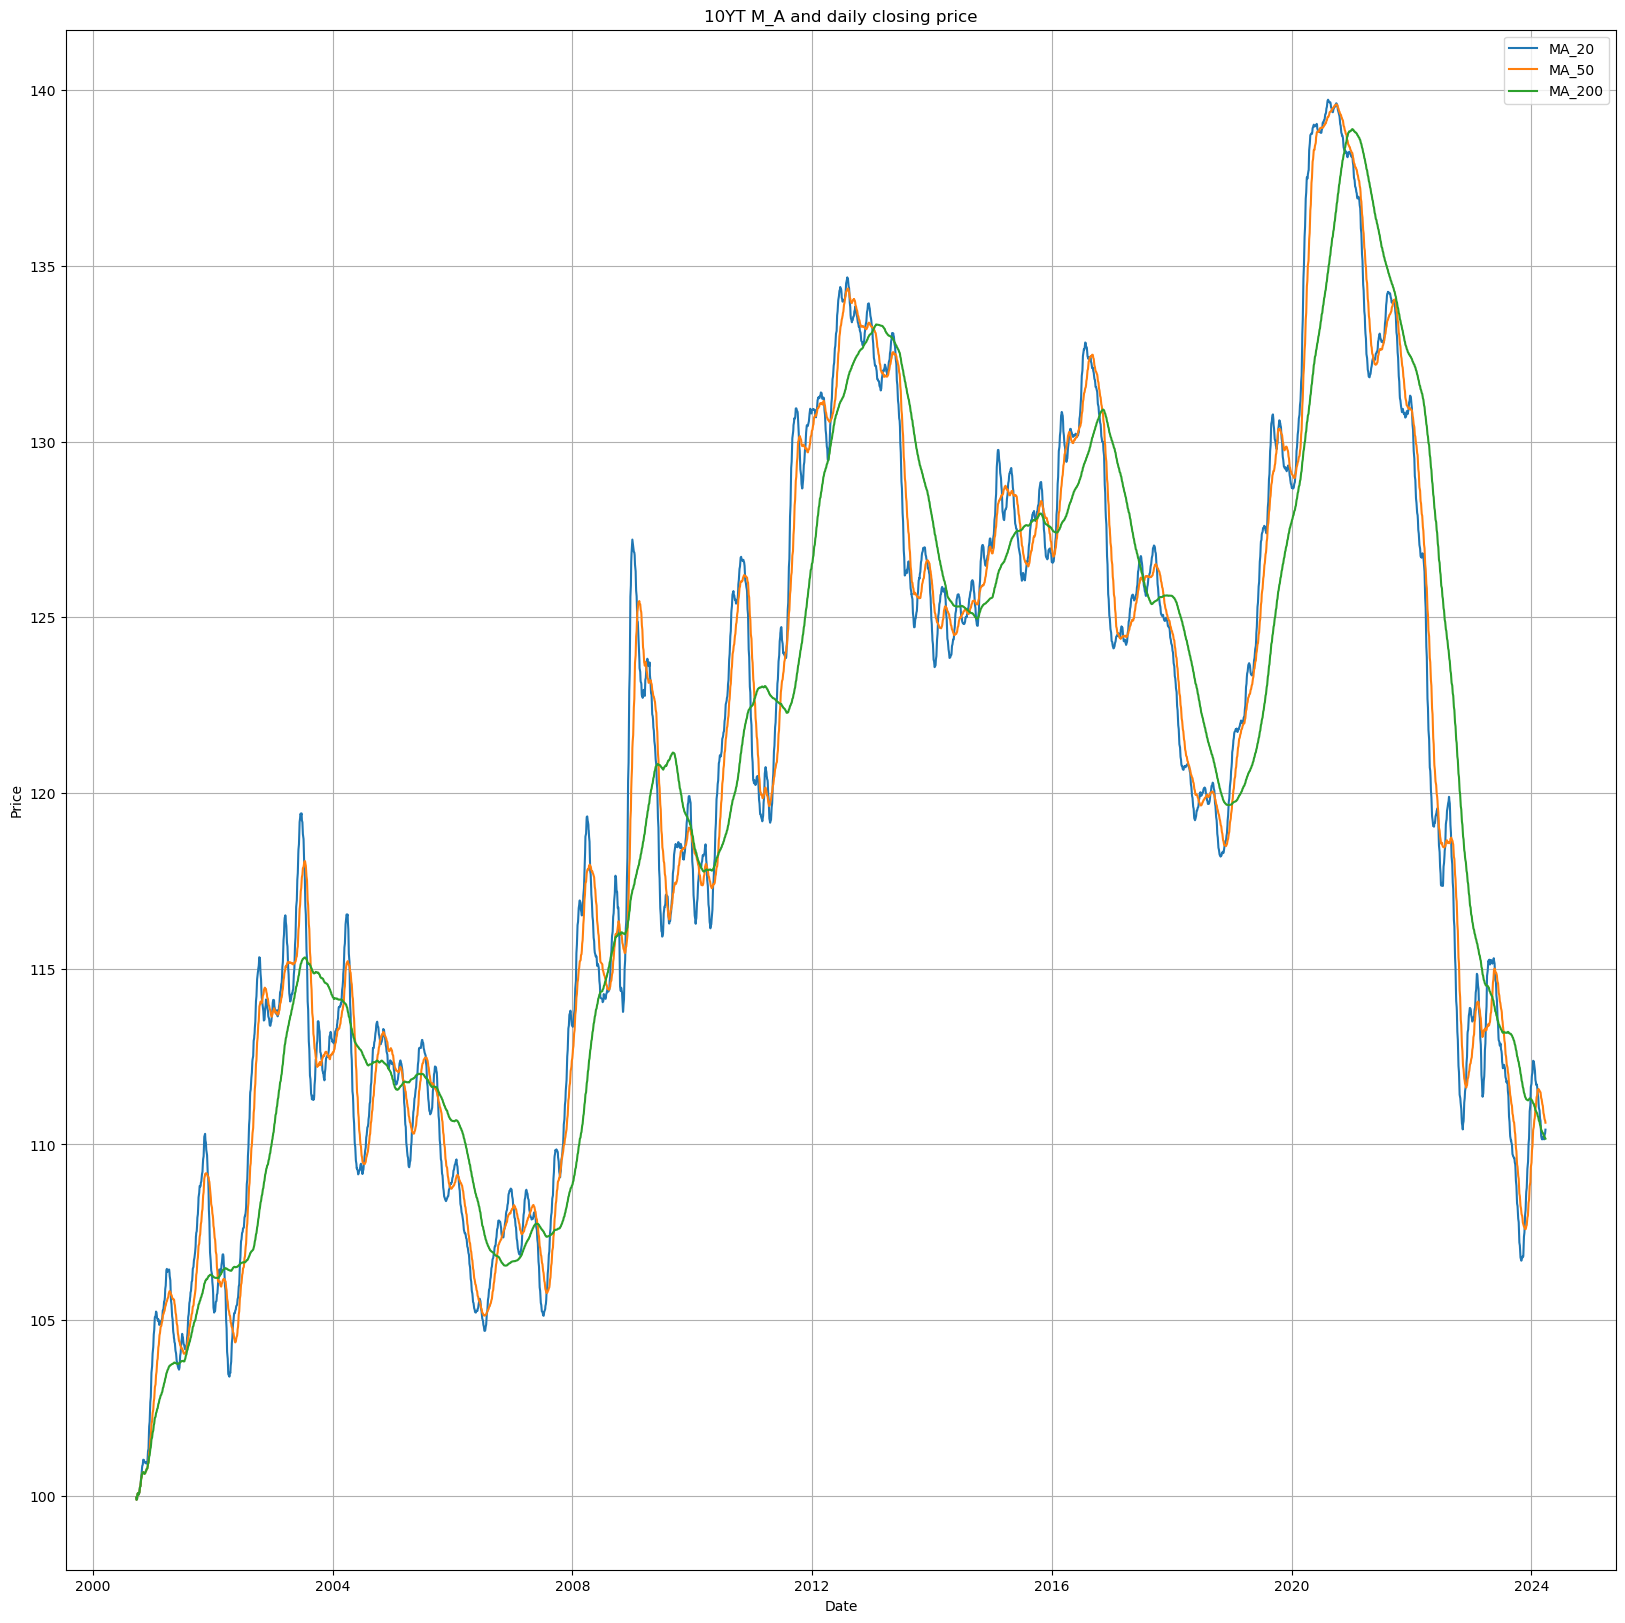

In [138]:
#MM

data['MA_20_Y'] = data['10Y'].rolling(window=20, min_periods=0).mean()
data['MA_50_Y'] = data['10Y'].rolling(window=50, min_periods=0).mean()
data['MA_200_Y'] = data['10Y'].rolling(window=200, min_periods=0).mean()

plt.figure(figsize=(20,20))
plt.plot(data['MA_20_Y'] , label = 'MA_20')
plt.plot(data['MA_50_Y'] , label = 'MA_50')
plt.plot(data['MA_200_Y'] , label = 'MA_200')
#plt.plot(data['10Y'] , label = 'Closing price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.title('10YT M_A and daily closing price')
plt.legend()

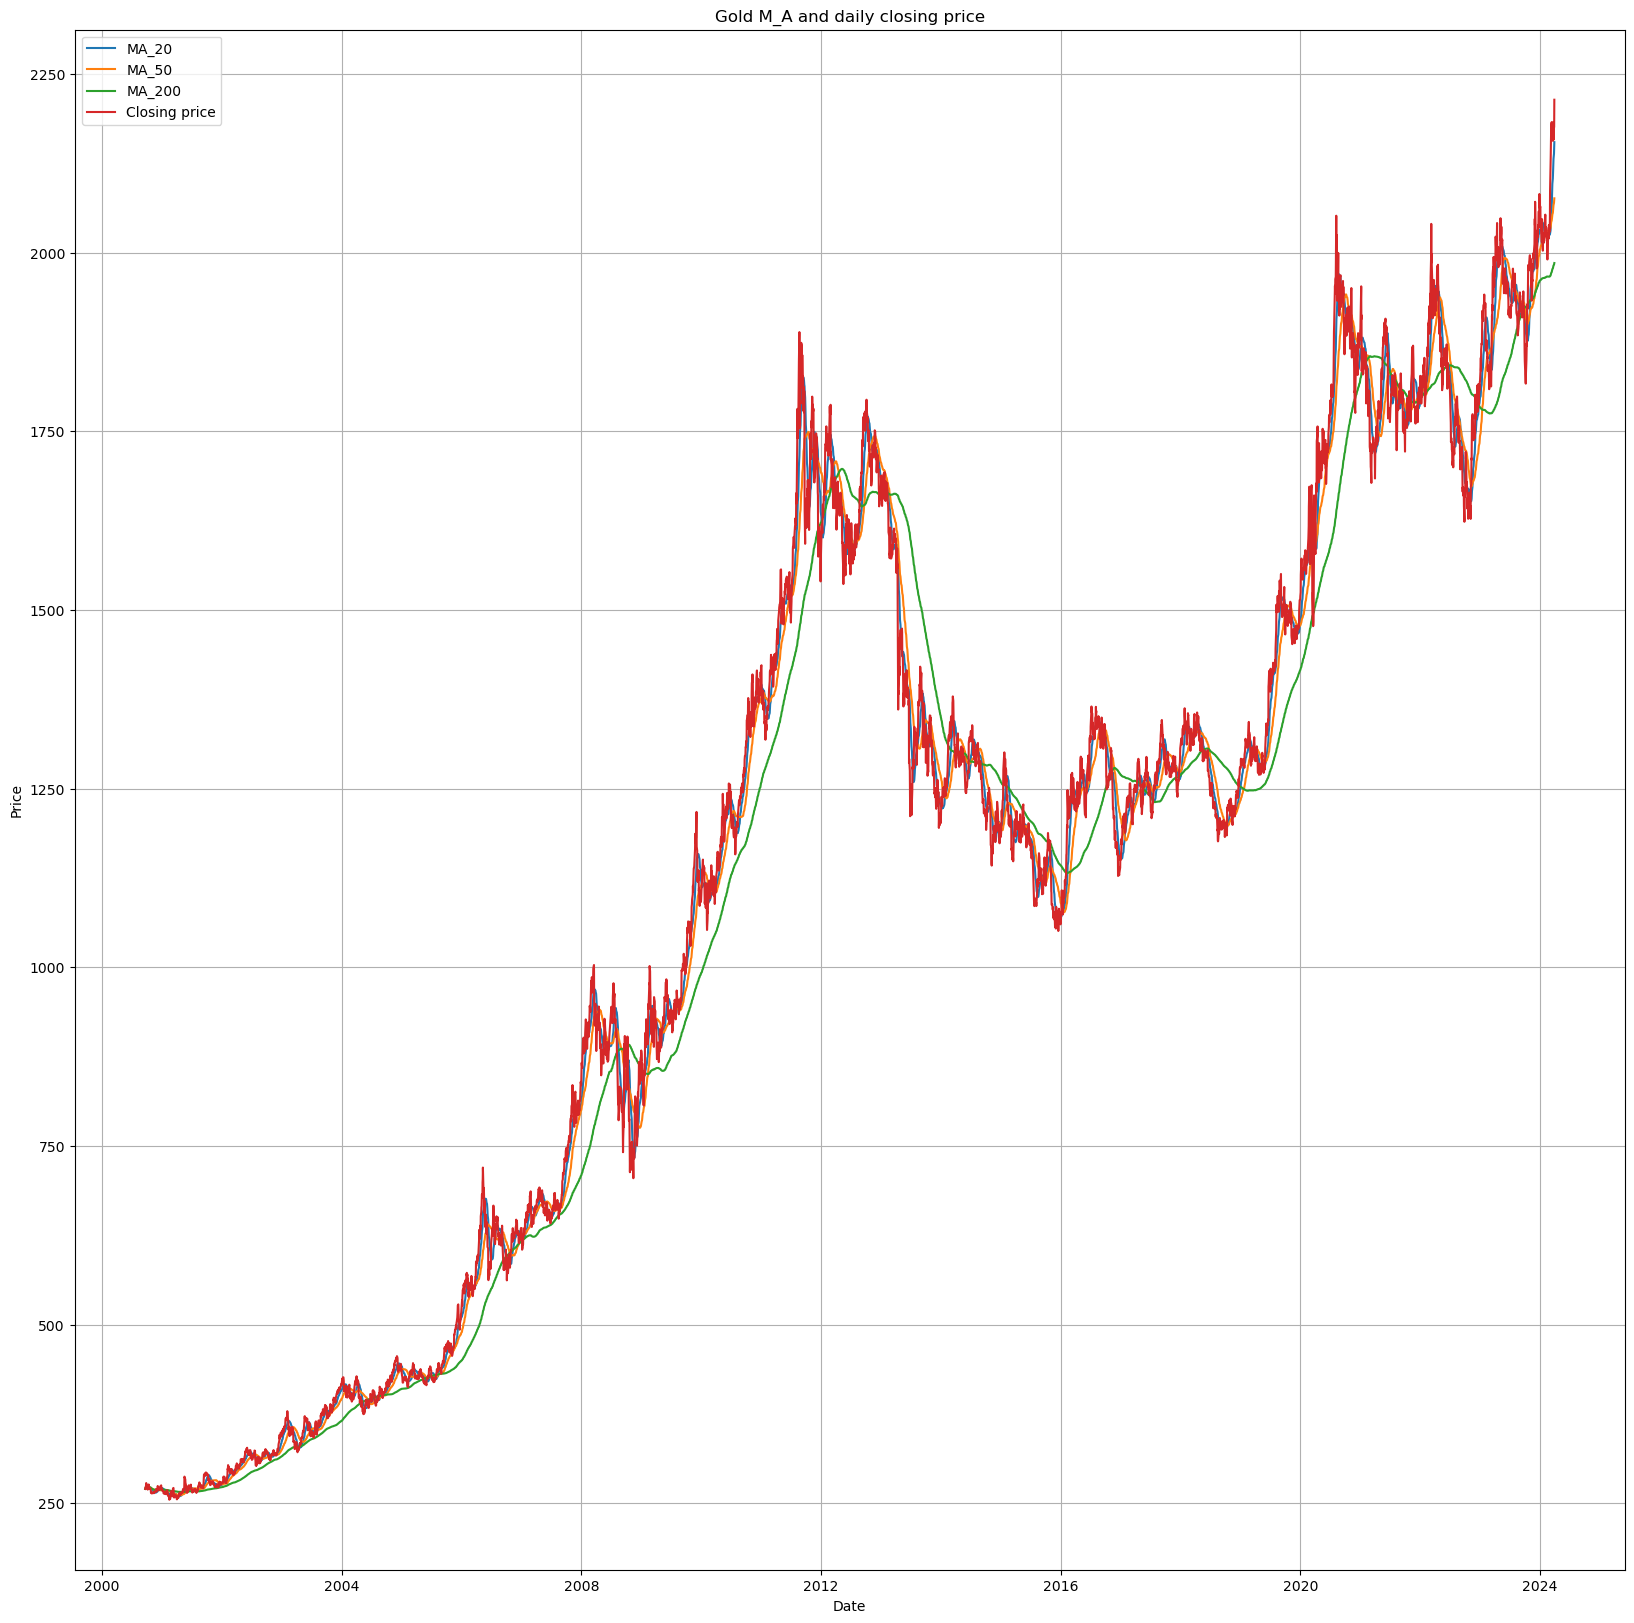

In [139]:
data['MA_20_G'] = data['Gold'].rolling(window=20, min_periods=0).mean()
data['MA_50_G'] = data['Gold'].rolling(window=50, min_periods=0).mean()
data['MA_200_G'] = data['Gold'].rolling(window=200, min_periods=0).mean()

plt.figure(figsize=(20,20))
plt.plot(data['MA_20_G'] , label = 'MA_20')
plt.plot(data['MA_50_G'] , label = 'MA_50')
plt.plot(data['MA_200_G'] , label = 'MA_200')
plt.plot(data['Gold'] , label = 'Closing price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.title('Gold M_A and daily closing price')
plt.legend()

In [140]:
data['10Y'].corr(data['Gold'])

0.6827102489552888

In [146]:
print(data['10Y'].std())

9.567245207215208


In [145]:
print(data['Gold'].std())

535.932071530971


In [141]:
X = np.arange(len(data)).reshape(-1,1)
y = data['10Y'].values.reshape(-1,1)

In [142]:
reg = LinearRegression().fit(X,y)

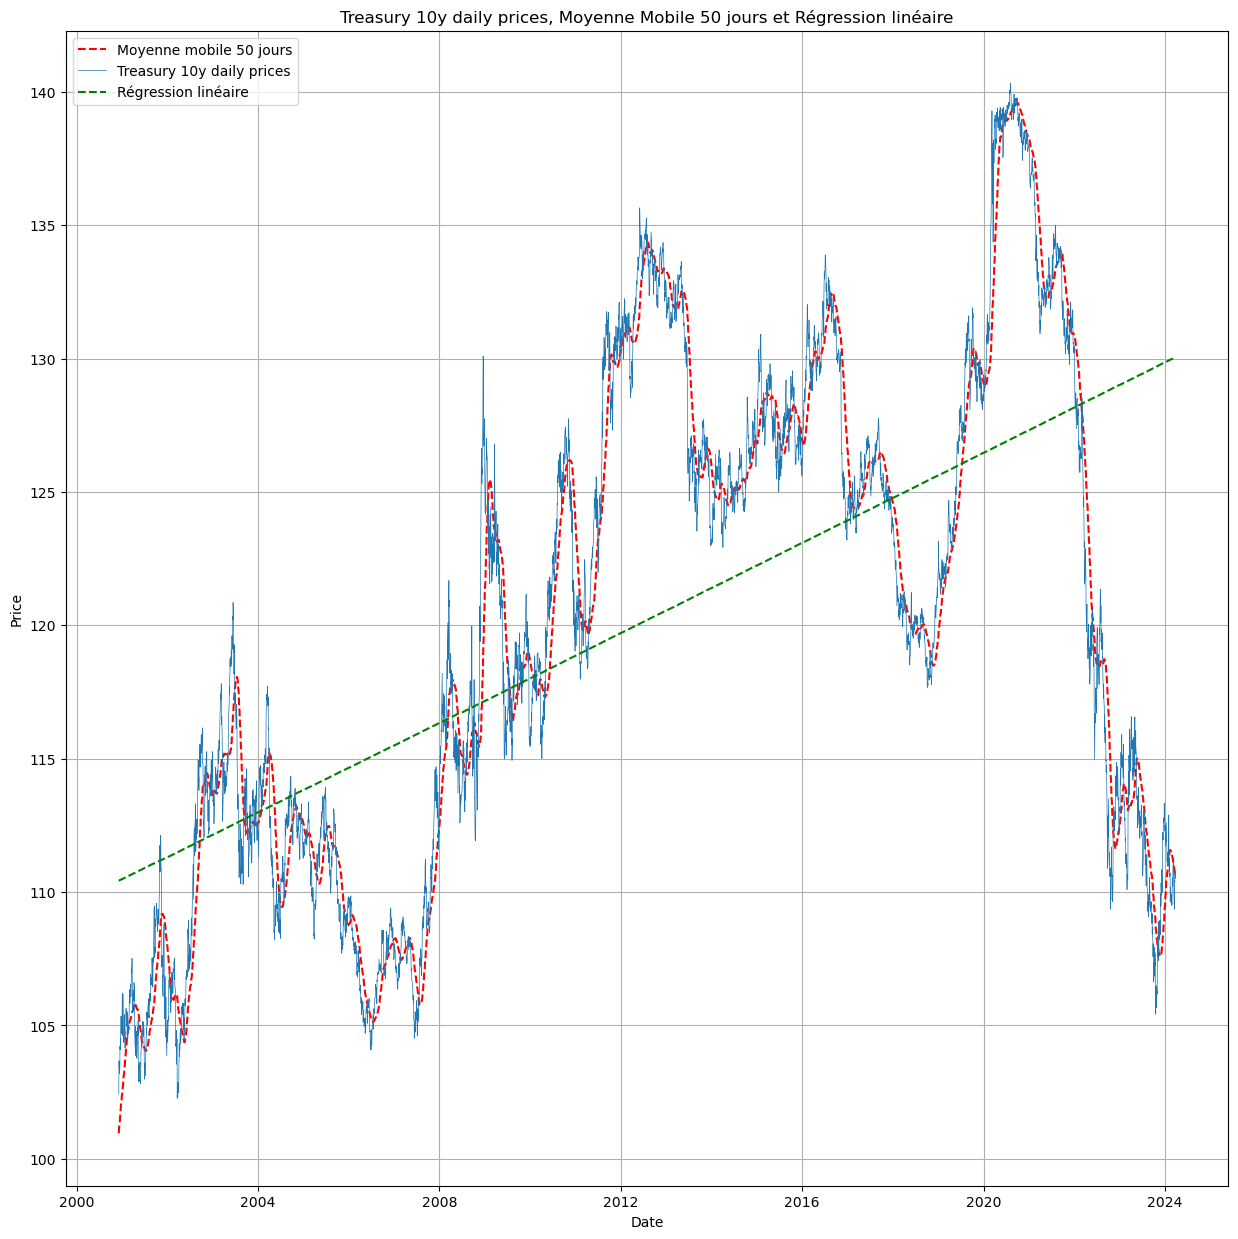

In [156]:
#Tracé du graphique en excluant les 60 premiers jours
plt.figure(figsize= (15,15))
plt.plot(data['MA_50_Y'][50:] , label = 'Moyenne mobile 50 jours', linestyle ='--', color='red')
plt.plot(data['10Y'][50:], label = 'Treasury 10y daily prices', linewidth=0.5)

#Tracé de la régression linéaire 
plt.plot(data.index[50:], reg.predict(X)[50:], label = 'Régression linéaire' , linestyle = '--' , color='green')

plt.title('Treasury 10y daily prices, Moyenne Mobile 50 jours et Régression linéaire')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

In [163]:
index_max = data['10Y'].idxmax()

ligne_max = data.loc[index_max]
print(ligne_max)

10Y          140.328125
Gold        2001.199951
MA_20_Y      139.584375
MA_50_Y      139.172812
MA_200_Y     134.617969
MA_20_G     1873.159998
MA_50_G     1793.374004
MA_200_G    1631.747501
Name: 2020-08-04 00:00:00, dtype: float64


In [ ]:
merge RSI indicator + inflexion points as buy / sell signals
Bollinger bands
Volume Weighted average price


[*********************100%%**********************]  1 of 1 completed


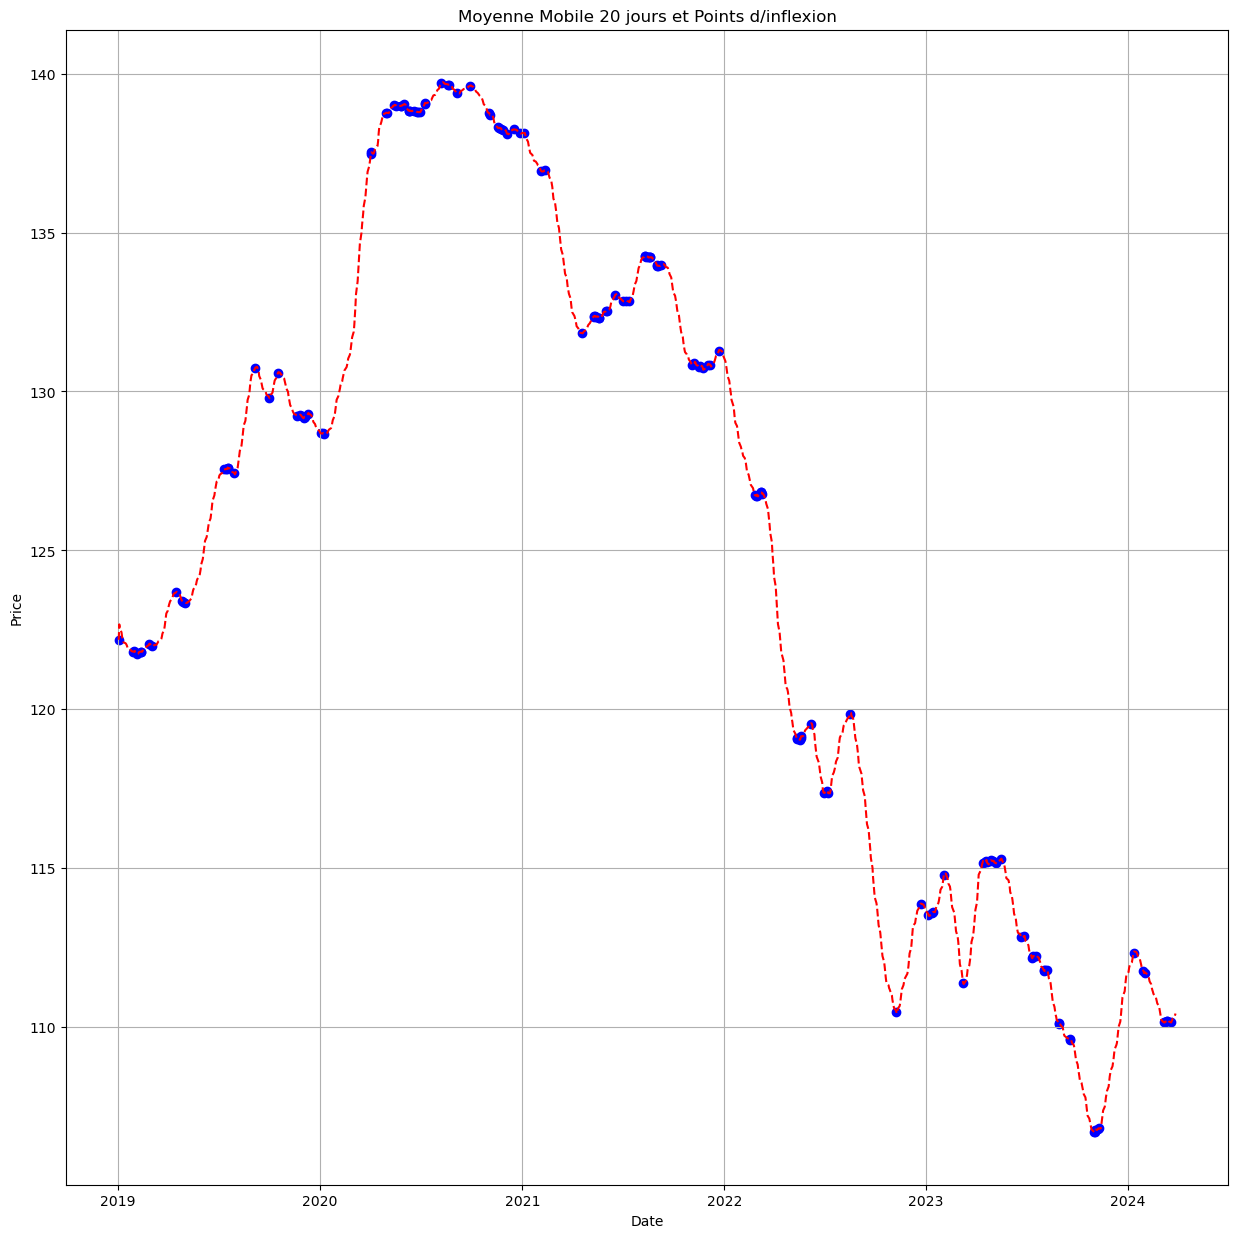

In [3]:
datafi = yf.download('ZN=F', start = '2019-01-01' , end = '2024-03-28')

datafi['MA_20']= datafi['Close'].rolling(window=20, min_periods=0).mean()

sma_20 = datafi['MA_20'].to_numpy()
diff1 = np.diff(sma_20, n=1)
inflexion_points = np.where(np.diff(np.sign(diff1)))[0]

plt.figure(figsize= (15,15))
plt.plot(datafi.index, datafi['MA_20'], label ='Moyenne mobile 20 jours', linestyle = '--' , color='red')
plt.scatter(datafi.index[inflexion_points], datafi['MA_20'].iloc[inflexion_points], label ='Points d/inflexion', marker = 'o' , color='blue')

plt.title('Moyenne Mobile 20 jours et Points d/inflexion')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
#plt.show()

In [5]:
change = datafi['Close'].diff()
change.dropna(inplace=True)
change_up = change.copy()
change_down = change.copy()

change_up[change_up<0] = 0
change_down[change_down>0] = 0

change.equals(change_up+change_down)

avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)

rsi.head(20)

Date
2019-01-03          NaN
2019-01-04          NaN
2019-01-07          NaN
2019-01-08          NaN
2019-01-09          NaN
2019-01-10          NaN
2019-01-11          NaN
2019-01-14          NaN
2019-01-15          NaN
2019-01-16          NaN
2019-01-17          NaN
2019-01-18          NaN
2019-01-22          NaN
2019-01-23    40.077821
2019-01-24    29.357798
2019-01-25    34.594595
2019-01-28    40.000000
2019-01-29    50.574713
2019-01-30    54.838710
2019-01-31    61.111111
Name: Close, dtype: float64

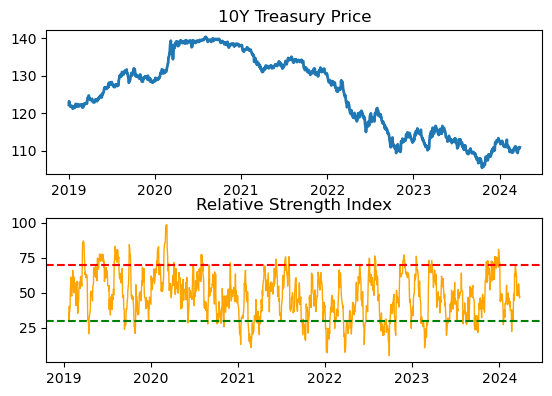

In [7]:
ax1 = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax2 = plt.subplot2grid((10,1), (5,0), rowspan = 4, colspan = 1)


ax1.plot(datafi['Close'], linewidth=2)
ax1.set_title('10Y Treasury Price')


ax2.set_title('Relative Strength Index')
ax2.plot(rsi, color='orange', linewidth=1)
ax2.axhline(30, linestyle='--', linewidth=1.5, color='green')
ax2.axhline(70, linestyle='--', linewidth=1.5, color='red')
plt.show()

In [9]:
inflexion_points

array([   0,   17,   19,   22,   27,   28,   37,   41,   72,   79,   80,
         83,  132,  133,  135,  136,  137,  144,  171,  188,  200,  225,
        227,  230,  232,  233,  237,  253,  254,  257,  315,  316,  333,
        335,  344,  346,  351,  352,  355,  361,  362,  364,  368,  373,
        374,  375,  381,  382,  403,  412,  413,  423,  438,  463,  464,
        474,  476,  479,  481,  486,  494,  501,  505,  527,  531,  577,
        592,  593,  594,  596,  599,  600,  607,  608,  620,  629,  632,
        635,  656,  657,  658,  660,  662,  663,  664,  672,  673,  674,
        677,  716,  719,  725,  727,  730,  736,  739,  750,  794,  795,
        797,  801,  802,  803,  847,  848,  850,  852,  853,  863,  880,
        882,  885,  912,  971, 1002, 1010, 1015, 1016, 1029, 1053, 1077,
       1079, 1081, 1083, 1087, 1088, 1089, 1094, 1100, 1125, 1128, 1137,
       1139, 1140, 1142, 1153, 1154, 1155, 1156, 1172, 1173, 1185, 1186,
       1216, 1218, 1219, 1222, 1223, 1266, 1277, 12

In [15]:
rsifi = rsi.to_numpy()

In [16]:
rsifi 

array([        nan,         nan,         nan, ..., 46.98795181,
       46.34146341, 47.41035857])

In [18]:
filtered_rsifi = rsifi[inflexion_points]
filtered_rsifi

array([        nan, 50.57471264, 61.11111111, 49.609375  , 57.82608696,
       50.        , 50.49019608, 45.59585492, 22.79792746, 49.75609756,
       50.48076923, 54.08163265, 39.74895397, 34.1563786 , 45.92274678,
       44.11764706, 48.66071429, 58.97435897, 48.01324503, 70.2247191 ,
       47.30538922, 48.4962406 , 55.39906103, 57.84313725, 55.9566787 ,
       49.60629921, 43.79844961, 52.25225225, 60.41666667, 58.12807882,
       55.0660793 , 62.5       , 61.30434783, 60.52631579, 59.55555556,
       48.66920152, 57.19844358, 45.        , 53.84615385, 47.60147601,
       53.7704918 , 51.63398693, 48.18481848, 69.87447699, 67.12328767,
       55.19125683, 56.46258503, 51.2345679 , 58.91472868, 42.59259259,
       31.42857143, 53.03867403, 63.15789474, 25.67567568, 47.73869347,
       47.34848485, 52.43445693, 40.57971014, 71.32867133, 51.97740113,
       45.        , 42.51968504, 32.20338983, 45.66929134, 45.6       ,
       65.60283688, 47.78761062, 36.30136986, 44.87179487, 56.75

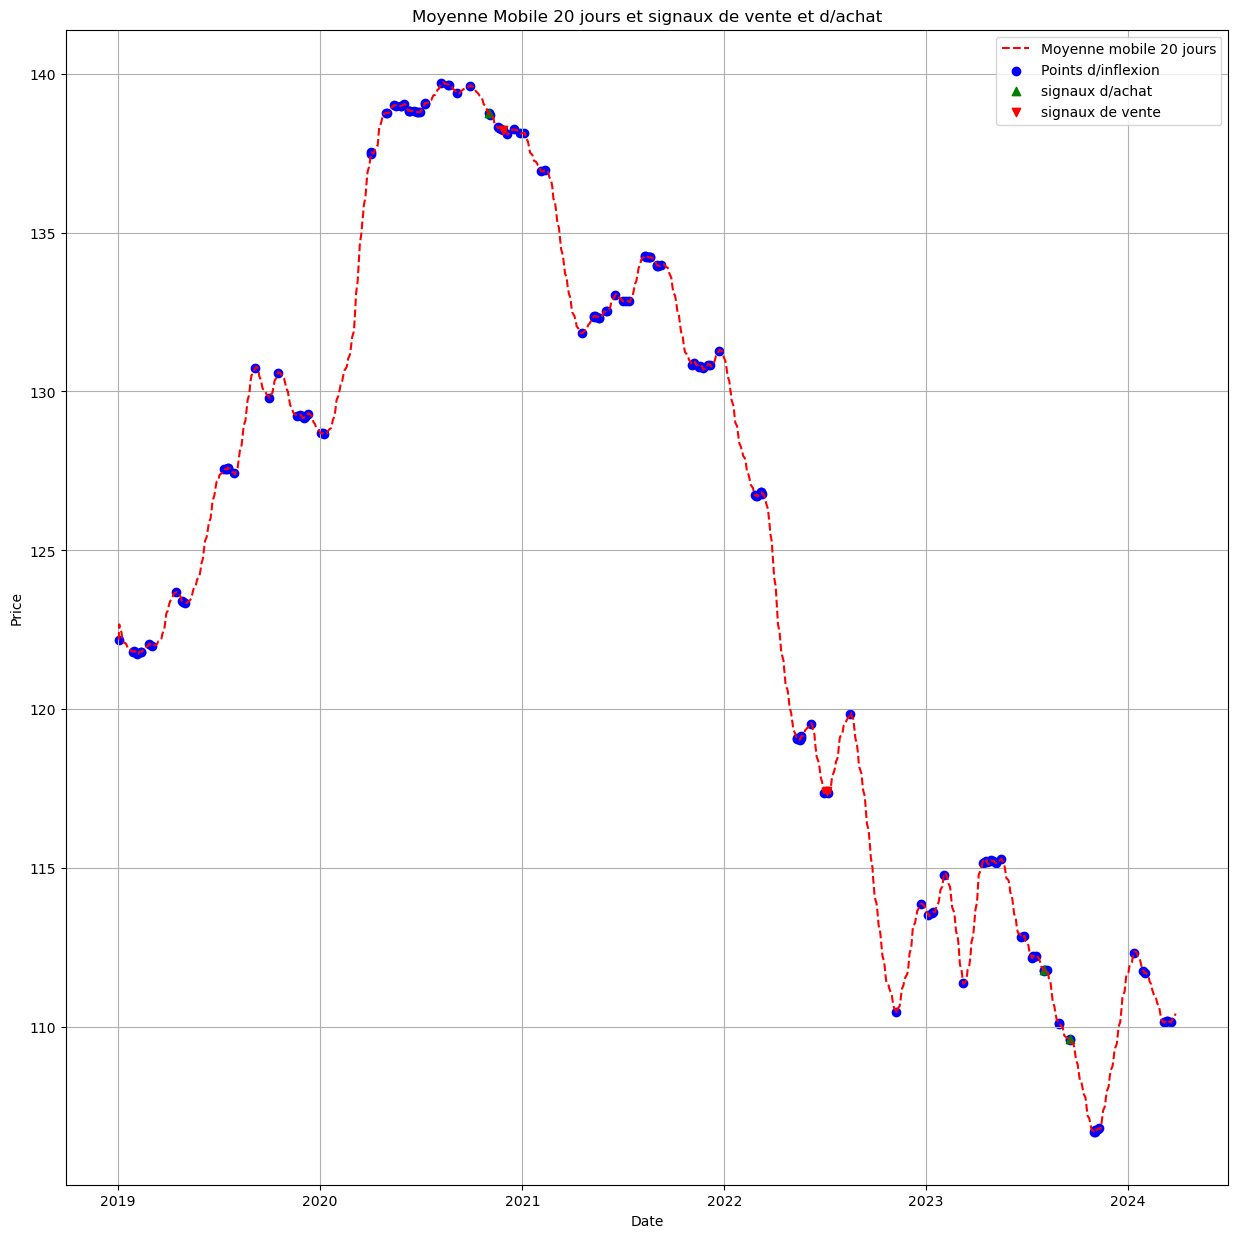

In [19]:
sma_40 = datafi['MA_20'].to_numpy()
diff2 = np.diff(sma_20, n=2)

buy_signal =[]
sell_signal = []

for i in range(1,len(inflexion_points)):
    if diff2[inflexion_points[i-1]]<0 and diff2[inflexion_points[i]]>0 and filtered_rsifi[i] < 30:
        buy_signal.append(inflexion_points[i])
    elif diff2[inflexion_points[i-1]]>0 and diff2[inflexion_points[i]]<0 and filtered_rsifi[i] > 70:
        sell_signal.append(inflexion_points[i])
        
plt.figure(figsize= (15,15))
plt.plot(datafi.index, datafi['MA_20'], label ='Moyenne mobile 20 jours', linestyle = '--' , color='red')
plt.scatter(datafi.index[inflexion_points], datafi['MA_20'].iloc[inflexion_points], label ='Points d/inflexion', marker = 'o' , color='blue')
plt.scatter(datafi.index[buy_signal], datafi['MA_20'].iloc[buy_signal], label ='signaux d/achat', marker = '^' , color='green')
plt.scatter(datafi.index[sell_signal], datafi['MA_20'].iloc[sell_signal], label ='signaux de vente', marker = 'v' , color='red')


plt.title('Moyenne Mobile 20 jours et signaux de vente et d/achat')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
datafi2=datafi.copy()
datafi2['log_returns'] = np.log(datafi2['Adj Close'] / datafi2['Adj Close'].shift(1))
dates_buy = datafi2.index[buy_signal]
dates_sell = datafi2.index[sell_signal]
datafi2['position'] = np.nan
datafi2.loc[datafi2.index.isin(dates_buy), 'position'] = 1
datafi2.loc[datafi2.index.isin(dates_sell), 'position'] = -1
#print(datafi2)

In [21]:
datafi2['strategy_returns'] = datafi2['log_returns'] * datafi2['position'].shift(1)
#print(datafi2)

                    Strategy
------------------  ----------
Start Period        2020-11-03
End Period          2023-09-19
Risk-Free Rate      3.5%
Time in Market      100.0%

Cumulative Return   -0.26%
CAGR﹪              -0.06%

Sharpe              -2.15
Prob. Sharpe Ratio  39.56%
Sortino             -3.53
Sortino/√2          -2.49
Omega               0.69

Max Drawdown        -0.85%
Longest DD Days     48

Gain/Pain Ratio     -0.26
Gain/Pain (1M)      -0.26

Payoff Ratio        1.12
Profit Factor       0.74
Common Sense Ratio  0.92
CPC Index           0.33
Tail Ratio          1.24
Outlier Win Ratio   1.89
Outlier Loss Ratio  1.51

MTD                 -0.34%
3M                  -0.85%
6M                  -0.85%
YTD                 -0.85%
1Y                  -0.85%
3Y (ann.)           -0.06%
5Y (ann.)           -0.06%
10Y (ann.)          -0.06%
All-time (ann.)     -0.06%

Avg. Drawdown       -0.85%
Avg. Drawdown Days  48
Recovery Factor     0.3
Ulcer Index         0.0
Serenity Index    

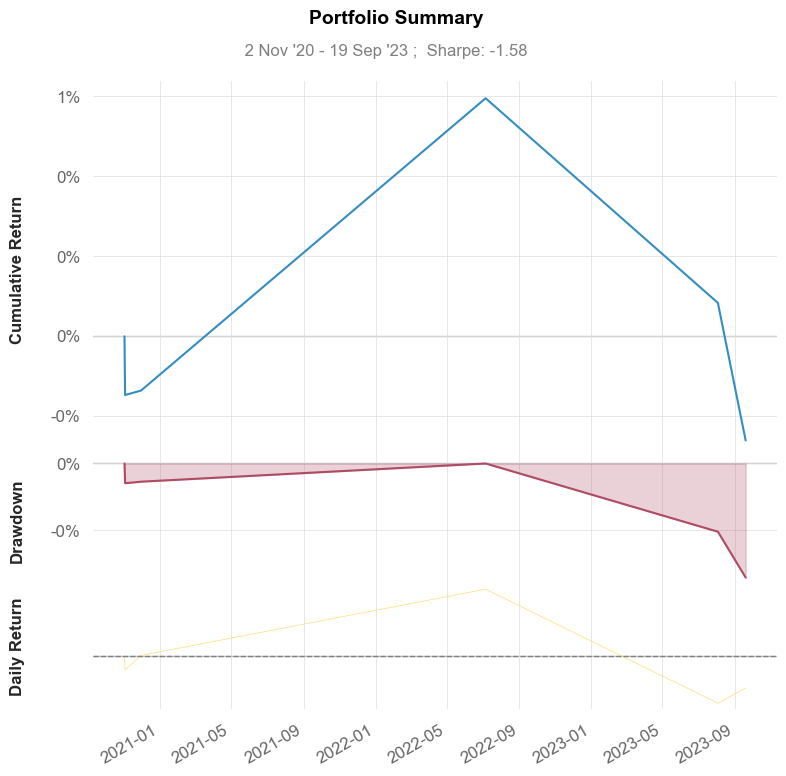

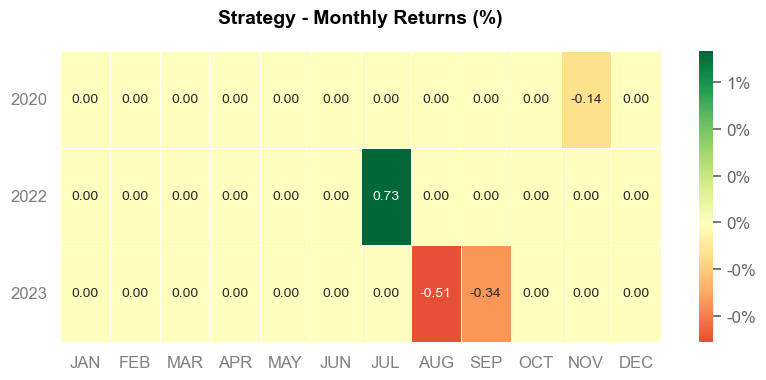

In [22]:
import quantstats as qs

qs.reports.basic(datafi2['strategy_returns'], rf=0.035)

In [ ]:
# i will now try to merge inflextion points and RSI strategies. If inflexion point (buy/sell signal) & RSI (<,> to 30,70) then decision taken to buy or sell